In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# gamma & regularization - both of them: high means more detailed, complex decision boundary.
# Low gamma and regularization means a bit rough calculation, slight errors, but low computation

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
iris.target[0:5]

array([0, 0, 0, 0, 0])

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
species_df = pd.DataFrame(iris.data, columns=iris.feature_names)
species_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
species_df.rename(
    columns={
        'sepal length (cm)': 'sepal_length',
        'sepal width (cm)': 'sepal_width',
        'petal length (cm)': 'petal_length',
        'petal width (cm)': 'petal_width'
    },
    inplace=True
)

In [19]:
species_df['target'] = iris.target
species_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [20]:
species_df['flower_name'] = species_df.target.apply(lambda x: iris.target_names[x])
species_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


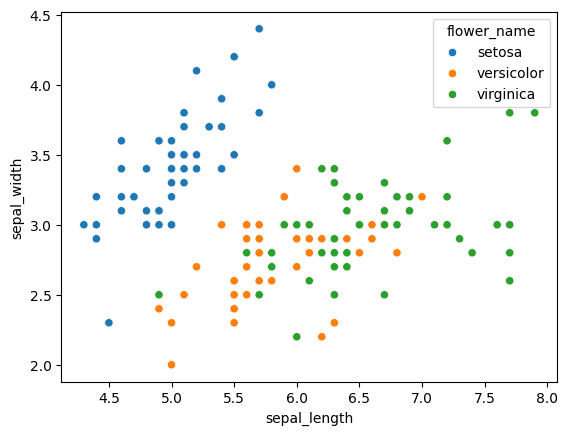

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use seaborn's scatterplot function
sns.scatterplot(
    x='sepal_length',
    y='sepal_width',
    hue='flower_name',  # Use hue for categorical coloring
    data=species_df,    # Provide the DataFrame
    marker='o',          # Set the marker style
    color='green'       # Set the color if you want a uniform color
)

plt.show()  # Display the plot


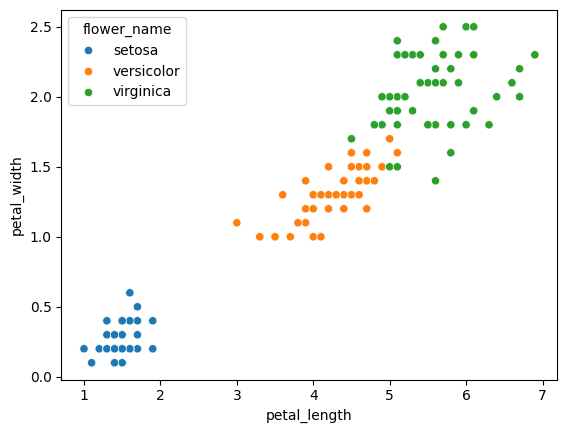

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use seaborn's scatterplot function
sns.scatterplot(
    x='petal_length',
    y='petal_width',
    hue='flower_name',  # Use hue for categorical coloring
    data=species_df,    # Provide the DataFrame
    marker='o',          # Set the marker style
    color='green'       # Set the color if you want a uniform color
)

plt.show()  # Display the plot


In [26]:
X = species_df.drop(['target', 'flower_name'], axis='columns')
y = species_df.target

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
# model = SVC(kernel='rbf', C=10, gamma='auto')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [37]:
model.score(X_test, y_test)

0.9

In [38]:
model.score(X_train, y_train)

1.0

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model.predict(X_test))

In [42]:
cm

array([[ 9,  0,  0],
       [ 0, 10,  3],
       [ 0,  0,  8]])

Text(95.72222222222221, 0.5, 'Truth')

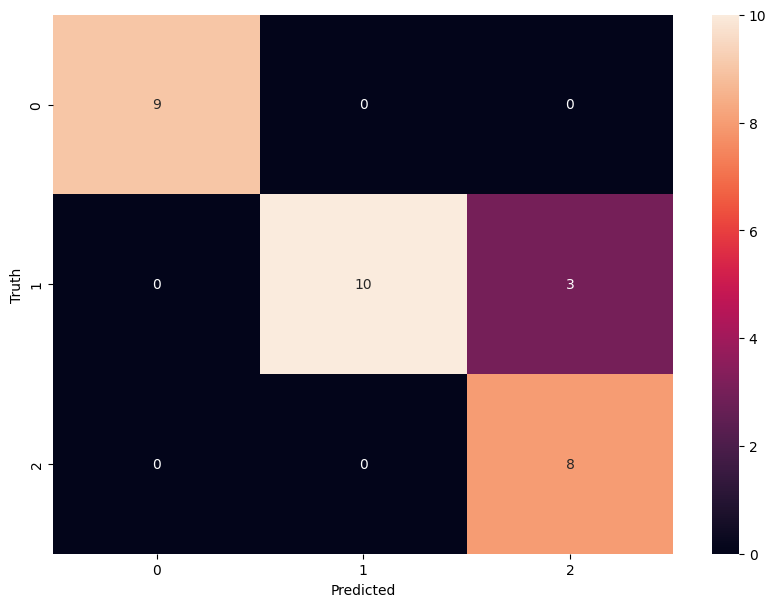

In [43]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Digits Classification

In [44]:
from sklearn.datasets import load_digits

digits = load_digits()

In [47]:
digits_df = pd.DataFrame(digits.data)
digits_df['target'] = digits.target

digits_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [48]:
X = digits_df.drop('target', axis='columns')
y = digits_df.target

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
from sklearn.svm import SVC

In [59]:
dig_model = SVC()

In [60]:
dig_model.fit(X_train, y_train)

SVC()

In [61]:
dig_model.score(X_test, y_test)

0.9777777777777777

In [62]:
dig_cf = confusion_matrix(y_test, dig_model.predict(X_test))

In [63]:
dig_cf

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 28,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 34,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 40]])

Text(95.72222222222221, 0.5, 'Truth')

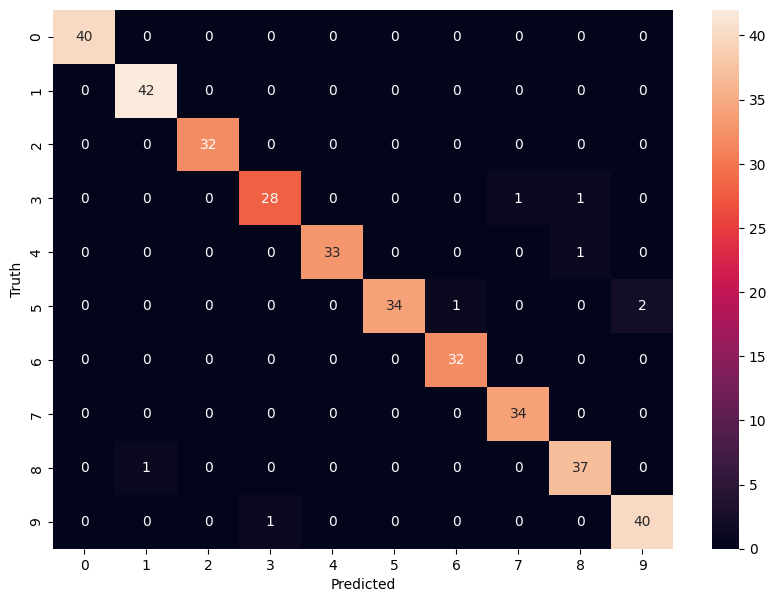

In [67]:
plt.figure(figsize=(10,7))
sns.heatmap(dig_cf, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')